# Customer Churn Prediction Analysis-Bank Customer Retention Strategy
## Task 3: Customer Churn Prediction (Bank Customers)

## 1. Introduction and Problem Statement

### Problem Statement
Predict which bank customers are likely to churn (leave the bank) based on their demographic, financial, and behavioral characteristics.
 
 ### Business Impact
 - Reduce customer attrition costs
 - Improve customer retention strategies
 - Optimize marketing and retention budget allocation
 - Increase customer lifetime value
 
 ### Objectives
 1. Identify key factors driving customer churn
 2. Build a predictive model to flag at-risk customers
 3. Provide actionable insights for retention strategies

In [42]:
# Import Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report,precision_score,recall_score,f1_score,roc_auc_score)
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Dataset Understanding and Description

In [43]:
# Load the dataset
df = pd.read_csv('Churn_Modelling.csv')

In [44]:
# Display basic information
print("=== DATASET OVERVIEW ===")
print(f"Dataset Shape: {df.shape}")
print(f"Number of features: {df.shape[1]}")
print(f"Number of records: {df.shape[0]}")

=== DATASET OVERVIEW ===
Dataset Shape: (10000, 14)
Number of features: 14
Number of records: 10000


In [45]:
# Display First % rows 
print("\n=== FIRST 5 RECORDS ===")
print(df.head())


=== FIRST 5 RECORDS ===
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.6

In [46]:
print("\n=== DATASET INFORMATION ===")
print(df.info())


=== DATASET INFORMATION ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None


In [47]:
print("\n=== BASIC STATISTICS ===")
print(df.describe())


=== BASIC STATISTICS ===
         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   

In [48]:
# Feature descriptions
feature_descriptions = {
    'RowNumber': 'Record number',
    'CustomerId': 'Unique customer identifier',
    'Surname': 'Customer surname',
    'CreditScore': 'Customer credit score',
    'Geography': 'Customer location (France, Spain, Germany)',
    'Gender': 'Customer gender',
    'Age': 'Customer age',
    'Tenure': 'Number of years with the bank',
    'Balance': 'Account balance',
    'NumOfProducts': 'Number of bank products used',
    'HasCrCard': 'Whether customer has credit card (1=Yes, 0=No)',
    'IsActiveMember': 'Whether customer is active (1=Yes, 0=No)',
    'EstimatedSalary': 'Estimated salary',
    'Exited': 'Whether customer churned (1=Yes, 0=No) - TARGET VARIABLE'
}

print("FEATURE DESCRIPTIONS:")
for feature, description in feature_descriptions.items():
    print(f"{feature}: {description}")

FEATURE DESCRIPTIONS:
RowNumber: Record number
CustomerId: Unique customer identifier
Surname: Customer surname
CreditScore: Customer credit score
Geography: Customer location (France, Spain, Germany)
Gender: Customer gender
Age: Customer age
Tenure: Number of years with the bank
Balance: Account balance
NumOfProducts: Number of bank products used
HasCrCard: Whether customer has credit card (1=Yes, 0=No)
IsActiveMember: Whether customer is active (1=Yes, 0=No)
EstimatedSalary: Estimated salary
Exited: Whether customer churned (1=Yes, 0=No) - TARGET VARIABLE


## 3. Data Cleaning and Preparation

In [49]:
# Check for missing values
print("\nMISSING VALUES ANALYSIS:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

if missing_values.sum() == 0:
    print("✓ No missing values found in the dataset")


MISSING VALUES ANALYSIS:
Series([], dtype: int64)
✓ No missing values found in the dataset


In [50]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\nDUPLICATE RECORDS: {duplicates}")
if duplicates == 0:
    print("✓ No duplicate records found")


DUPLICATE RECORDS: 0
✓ No duplicate records found


In [51]:
# Drop unnecessary columns that won't help in prediction
columns_to_drop = ['RowNumber', 'CustomerId', 'Surname']
df_clean = df.drop(columns_to_drop, axis=1)

print(f"✓ Dropped columns: {columns_to_drop}")
print(f"New dataset shape: {df_clean.shape}")


✓ Dropped columns: ['RowNumber', 'CustomerId', 'Surname']
New dataset shape: (10000, 11)


In [52]:
# Check data types
print("\nDATA TYPES:")
print(df_clean.dtypes)


DATA TYPES:
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object


In [53]:
# Check target variable distribution
print("\nTARGET VARIABLE DISTRIBUTION:")
target_distribution = df_clean['Exited'].value_counts()
target_percentage = df_clean['Exited'].value_counts(normalize=True) * 100

print("Counts:")
print(target_distribution)
print("\nPercentages:")
print(target_percentage.round(2))


TARGET VARIABLE DISTRIBUTION:
Counts:
Exited
0    7963
1    2037
Name: count, dtype: int64

Percentages:
Exited
0    79.63
1    20.37
Name: proportion, dtype: float64


In [54]:
# Check for class imbalance
imbalance_ratio = target_distribution[0] / target_distribution[1]
print(f"\nClass Imbalance Ratio (Majority:Minority): {imbalance_ratio:.2f}:1")


Class Imbalance Ratio (Majority:Minority): 3.91:1


## 4. Exploratory Data Analysis (EDA) with Graphs

### 4.1 Target Variable Distribution

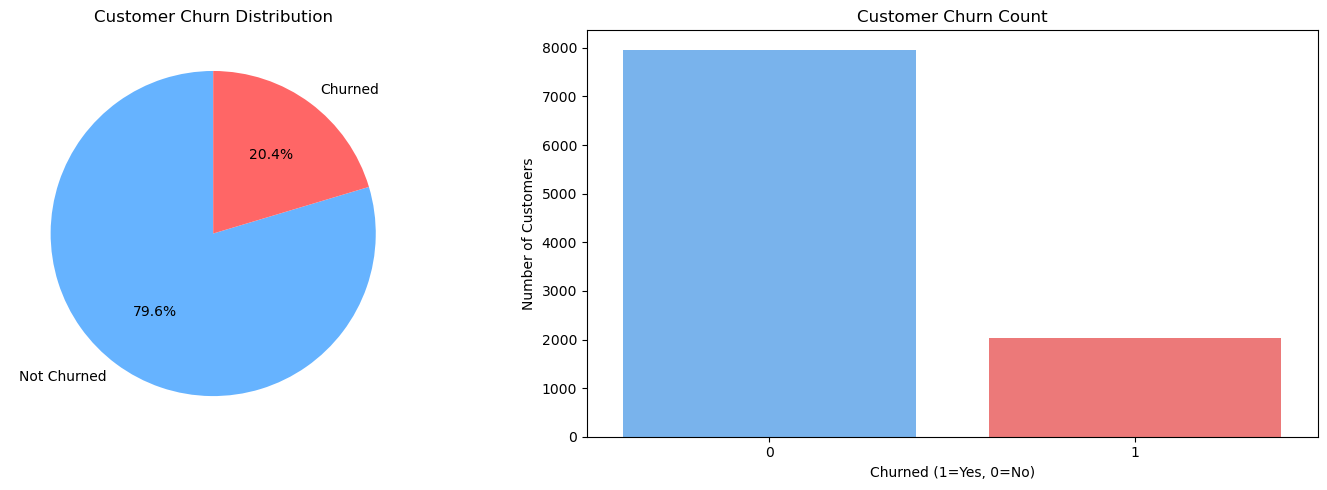

In [55]:
# Target variable visualization
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
colors = ['#66b3ff', '#ff6666']
plt.pie(target_distribution.values, labels=['Not Churned', 'Churned'], 
        autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Customer Churn Distribution')

plt.subplot(1, 2, 2)
sns.countplot(data=df_clean, x='Exited', palette=colors)
plt.title('Customer Churn Count')
plt.xlabel('Churned (1=Yes, 0=No)')
plt.ylabel('Number of Customers')

plt.tight_layout()
plt.show()

### 4.2 Categorical Variables Analysis

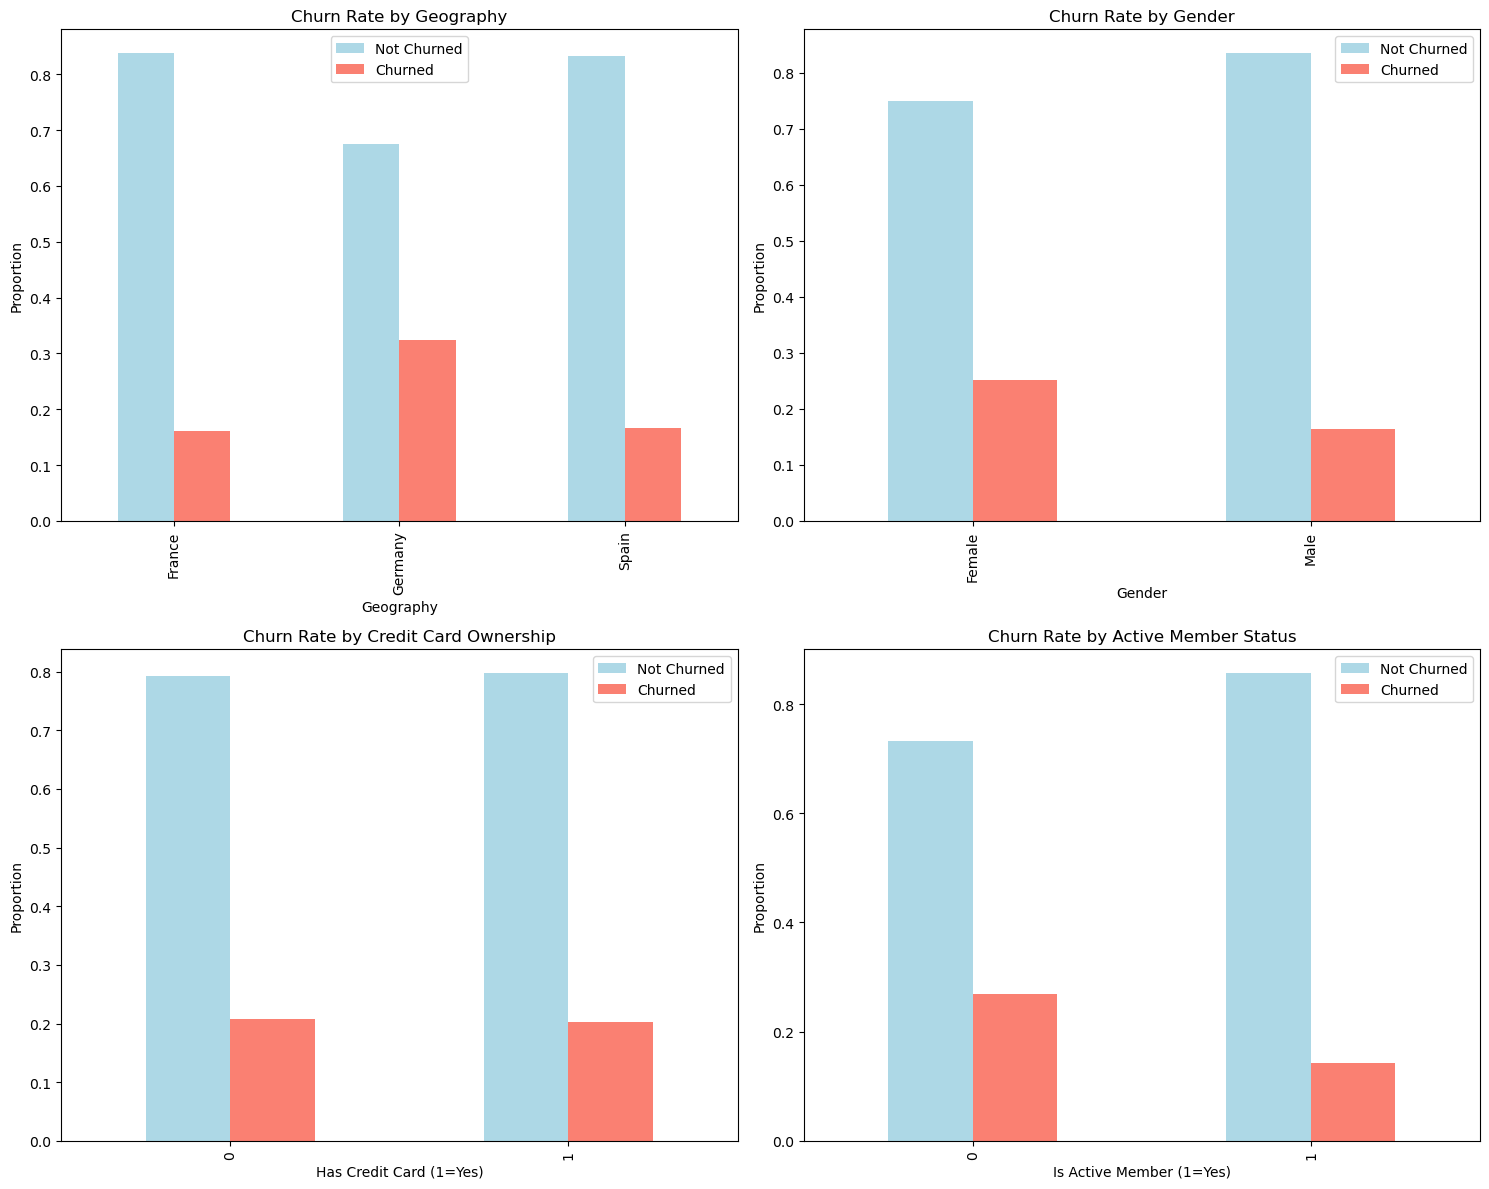

In [56]:
# Categorical variables analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Geography vs Churn
pd.crosstab(df_clean['Geography'], df_clean['Exited'], normalize='index').plot(
    kind='bar', ax=axes[0,0], color=['lightblue', 'salmon'])
axes[0,0].set_title('Churn Rate by Geography')
axes[0,0].set_xlabel('Geography')
axes[0,0].set_ylabel('Proportion')
axes[0,0].legend(['Not Churned', 'Churned'])

# Gender vs Churn
pd.crosstab(df_clean['Gender'], df_clean['Exited'], normalize='index').plot(
    kind='bar', ax=axes[0,1], color=['lightblue', 'salmon'])
axes[0,1].set_title('Churn Rate by Gender')
axes[0,1].set_xlabel('Gender')
axes[0,1].set_ylabel('Proportion')
axes[0,1].legend(['Not Churned', 'Churned'])

# Has Credit Card vs Churn
pd.crosstab(df_clean['HasCrCard'], df_clean['Exited'], normalize='index').plot(
    kind='bar', ax=axes[1,0], color=['lightblue', 'salmon'])
axes[1,0].set_title('Churn Rate by Credit Card Ownership')
axes[1,0].set_xlabel('Has Credit Card (1=Yes)')
axes[1,0].set_ylabel('Proportion')
axes[1,0].legend(['Not Churned', 'Churned'])

# Active Member vs Churn
pd.crosstab(df_clean['IsActiveMember'], df_clean['Exited'], normalize='index').plot(
    kind='bar', ax=axes[1,1], color=['lightblue', 'salmon'])
axes[1,1].set_title('Churn Rate by Active Member Status')
axes[1,1].set_xlabel('Is Active Member (1=Yes)')
axes[1,1].set_ylabel('Proportion')
axes[1,1].legend(['Not Churned', 'Churned'])

plt.tight_layout()
plt.show()

### 4.3 Numerical Variables Analysis

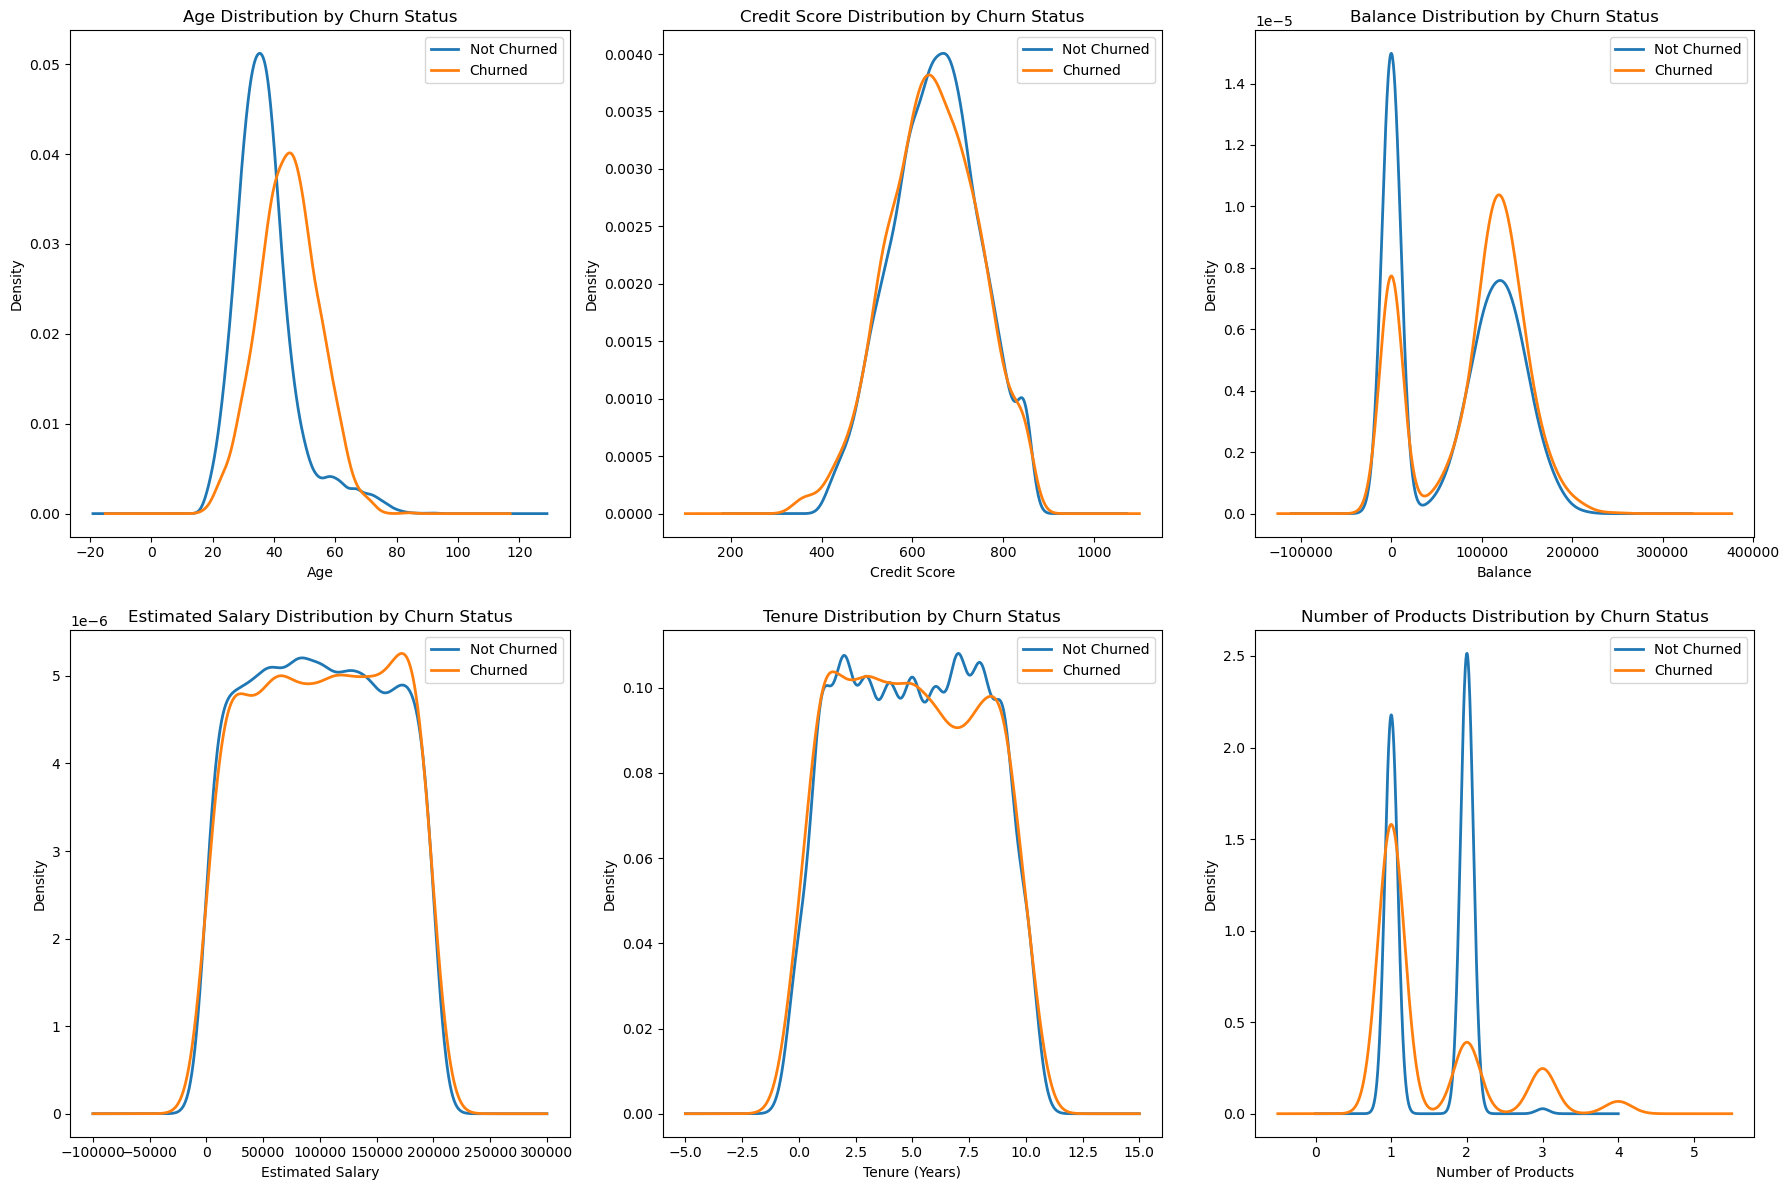

In [57]:
# Numerical variables analysis
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Age distribution
df_clean[df_clean['Exited'] == 0]['Age'].plot(kind='kde', ax=axes[0,0], 
                                            label='Not Churned', linewidth=2)
df_clean[df_clean['Exited'] == 1]['Age'].plot(kind='kde', ax=axes[0,0], 
                                            label='Churned', linewidth=2)
axes[0,0].set_title('Age Distribution by Churn Status')
axes[0,0].set_xlabel('Age')
axes[0,0].legend()

# Credit Score distribution
df_clean[df_clean['Exited'] == 0]['CreditScore'].plot(kind='kde', ax=axes[0,1], 
                                                    label='Not Churned', linewidth=2)
df_clean[df_clean['Exited'] == 1]['CreditScore'].plot(kind='kde', ax=axes[0,1], 
                                                    label='Churned', linewidth=2)
axes[0,1].set_title('Credit Score Distribution by Churn Status')
axes[0,1].set_xlabel('Credit Score')
axes[0,1].legend()

# Balance distribution
df_clean[df_clean['Exited'] == 0]['Balance'].plot(kind='kde', ax=axes[0,2], 
                                                label='Not Churned', linewidth=2)
df_clean[df_clean['Exited'] == 1]['Balance'].plot(kind='kde', ax=axes[0,2], 
                                                label='Churned', linewidth=2)
axes[0,2].set_title('Balance Distribution by Churn Status')
axes[0,2].set_xlabel('Balance')
axes[0,2].legend()

# Estimated Salary distribution
df_clean[df_clean['Exited'] == 0]['EstimatedSalary'].plot(kind='kde', ax=axes[1,0], 
                                                        label='Not Churned', linewidth=2)
df_clean[df_clean['Exited'] == 1]['EstimatedSalary'].plot(kind='kde', ax=axes[1,0], 
                                                        label='Churned', linewidth=2)
axes[1,0].set_title('Estimated Salary Distribution by Churn Status')
axes[1,0].set_xlabel('Estimated Salary')
axes[1,0].legend()

# Tenure distribution
df_clean[df_clean['Exited'] == 0]['Tenure'].plot(kind='kde', ax=axes[1,1], 
                                               label='Not Churned', linewidth=2)
df_clean[df_clean['Exited'] == 1]['Tenure'].plot(kind='kde', ax=axes[1,1], 
                                               label='Churned', linewidth=2)
axes[1,1].set_title('Tenure Distribution by Churn Status')
axes[1,1].set_xlabel('Tenure (Years)')
axes[1,1].legend()

# Number of Products
df_clean[df_clean['Exited'] == 0]['NumOfProducts'].plot(kind='kde', ax=axes[1,2], 
                                                      label='Not Churned', linewidth=2)
df_clean[df_clean['Exited'] == 1]['NumOfProducts'].plot(kind='kde', ax=axes[1,2], 
                                                      label='Churned', linewidth=2)
axes[1,2].set_title('Number of Products Distribution by Churn Status')
axes[1,2].set_xlabel('Number of Products')
axes[1,2].legend()

plt.tight_layout()
plt.show()


### 4.4 Correlation Analysis

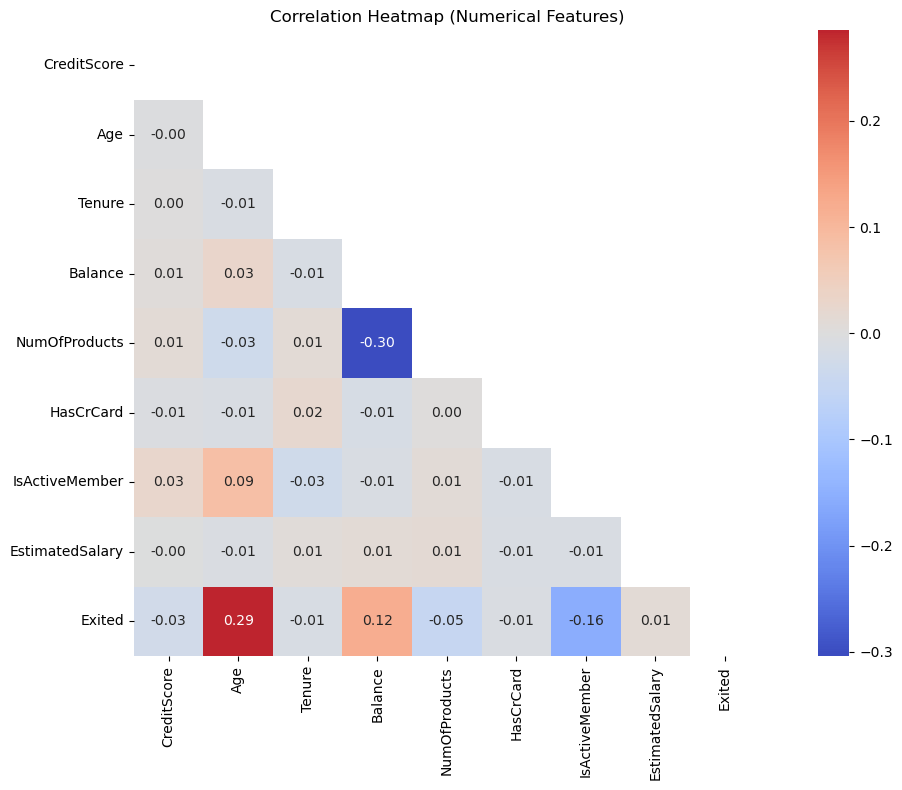

In [58]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
numeric_df = df_clean.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', 
           center=0, square=True, fmt='.2f')
plt.title('Correlation Heatmap (Numerical Features)')
plt.tight_layout()
plt.show()

### 4.5 Key Insights from EDA

In [59]:
# Age insights
avg_age_churned = df_clean[df_clean['Exited'] == 1]['Age'].mean()
avg_age_retained = df_clean[df_clean['Exited'] == 0]['Age'].mean()
print(f"\n1. Age Analysis:")
print(f"   - Average age of churned customers: {avg_age_churned:.1f} years")
print(f"   - Average age of retained customers: {avg_age_retained:.1f} years")
print(f"   - Age difference: {avg_age_churned - avg_age_retained:.1f} years")

# Geography insights
geo_churn = pd.crosstab(df_clean['Geography'], df_clean['Exited'], normalize='index')
print(f"\n2. Geography Analysis:")
for country in geo_churn.index:
    churn_rate = geo_churn.loc[country, 1] * 100
    print(f"   - {country}: {churn_rate:.1f}% churn rate")

# Gender insights
gender_churn = pd.crosstab(df_clean['Gender'], df_clean['Exited'], normalize='index')
print(f"\n3. Gender Analysis:")
for gender in gender_churn.index:
    churn_rate = gender_churn.loc[gender, 1] * 100
    print(f"   - {gender}: {churn_rate:.1f}% churn rate")

# Active member insights
active_churn = pd.crosstab(df_clean['IsActiveMember'], df_clean['Exited'], normalize='index')
print(f"\n4. Active Member Analysis:")
print(f"   - Active members: {active_churn.loc[1, 1]*100:.1f}% churn rate")
print(f"   - Inactive members: {active_churn.loc[0, 1]*100:.1f}% churn rate")

# Balance insights
print(f"\n5. Balance Analysis:")
print(f"   - Churned customers avg balance: €{df_clean[df_clean['Exited'] == 1]['Balance'].mean():.2f}")
print(f"   - Retained customers avg balance: €{df_clean[df_clean['Exited'] == 0]['Balance'].mean():.2f}")


1. Age Analysis:
   - Average age of churned customers: 44.8 years
   - Average age of retained customers: 37.4 years
   - Age difference: 7.4 years

2. Geography Analysis:
   - France: 16.2% churn rate
   - Germany: 32.4% churn rate
   - Spain: 16.7% churn rate

3. Gender Analysis:
   - Female: 25.1% churn rate
   - Male: 16.5% churn rate

4. Active Member Analysis:
   - Active members: 14.3% churn rate
   - Inactive members: 26.9% churn rate

5. Balance Analysis:
   - Churned customers avg balance: €91108.54
   - Retained customers avg balance: €72745.30


## 5. Data Preprocessing for Modeling

In [60]:
# Encode categorical variables
print("\nENCODING CATEGORICAL VARIABLES:")

# Label encoding for Gender
label_encoder = LabelEncoder()
df_clean['Gender'] = label_encoder.fit_transform(df_clean['Gender'])
print(f"✓ Gender encoded: {dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))}")

# One-hot encoding for Geography
df_encoded = pd.get_dummies(df_clean, columns=['Geography'], prefix='Geo', drop_first=True)
print(f"✓ Geography one-hot encoded")
print(f"New features: {[col for col in df_encoded.columns if 'Geo' in col]}")

print(f"\nFinal dataset shape: {df_encoded.shape}")
print("Final features:", df_encoded.columns.tolist())

# %%
# Prepare features and target
X = df_encoded.drop('Exited', axis=1)
y = df_encoded['Exited']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

print("DATA SPLITTING:")
print(f"Training set size: {X_train.shape[0]} ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Test set size: {X_test.shape[0]} ({X_test.shape[0]/len(X)*100:.1f}%)")
print(f"Churn rate in training set: {y_train.mean():.3f}")
print(f"Churn rate in test set: {y_test.mean():.3f}")

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n✓ Features scaled using StandardScaler")


ENCODING CATEGORICAL VARIABLES:
✓ Gender encoded: {'Female': 0, 'Male': 1}
✓ Geography one-hot encoded
New features: ['Geo_Germany', 'Geo_Spain']

Final dataset shape: (10000, 12)
Final features: ['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geo_Germany', 'Geo_Spain']
DATA SPLITTING:
Training set size: 8000 (80.0%)
Test set size: 2000 (20.0%)
Churn rate in training set: 0.204
Churn rate in test set: 0.203

✓ Features scaled using StandardScaler


## 6. Model Training and Testing

In [61]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100)
}

# Train and evaluate models
results = {}

print("\nTRAINING MODELS...")
for name, model in models.items():
    print(f"\nTraining {name}...")
    
    if name == 'Logistic Regression':
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_pred_proba)
    
    results[name] = {
        'model': model,
        'predictions': y_pred,
        'probabilities': y_pred_proba,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'auc_score': auc_score
    }


TRAINING MODELS...

Training Logistic Regression...

Training Random Forest...


## 7. Evaluation Metrices


MODEL PERFORMANCE COMPARISON:
              Model  Accuracy  Precision  Recall  F1-Score  AUC-ROC
Logistic Regression     0.808     0.5891  0.1867    0.2836   0.7748
      Random Forest     0.861     0.7699  0.4521    0.5697   0.8545


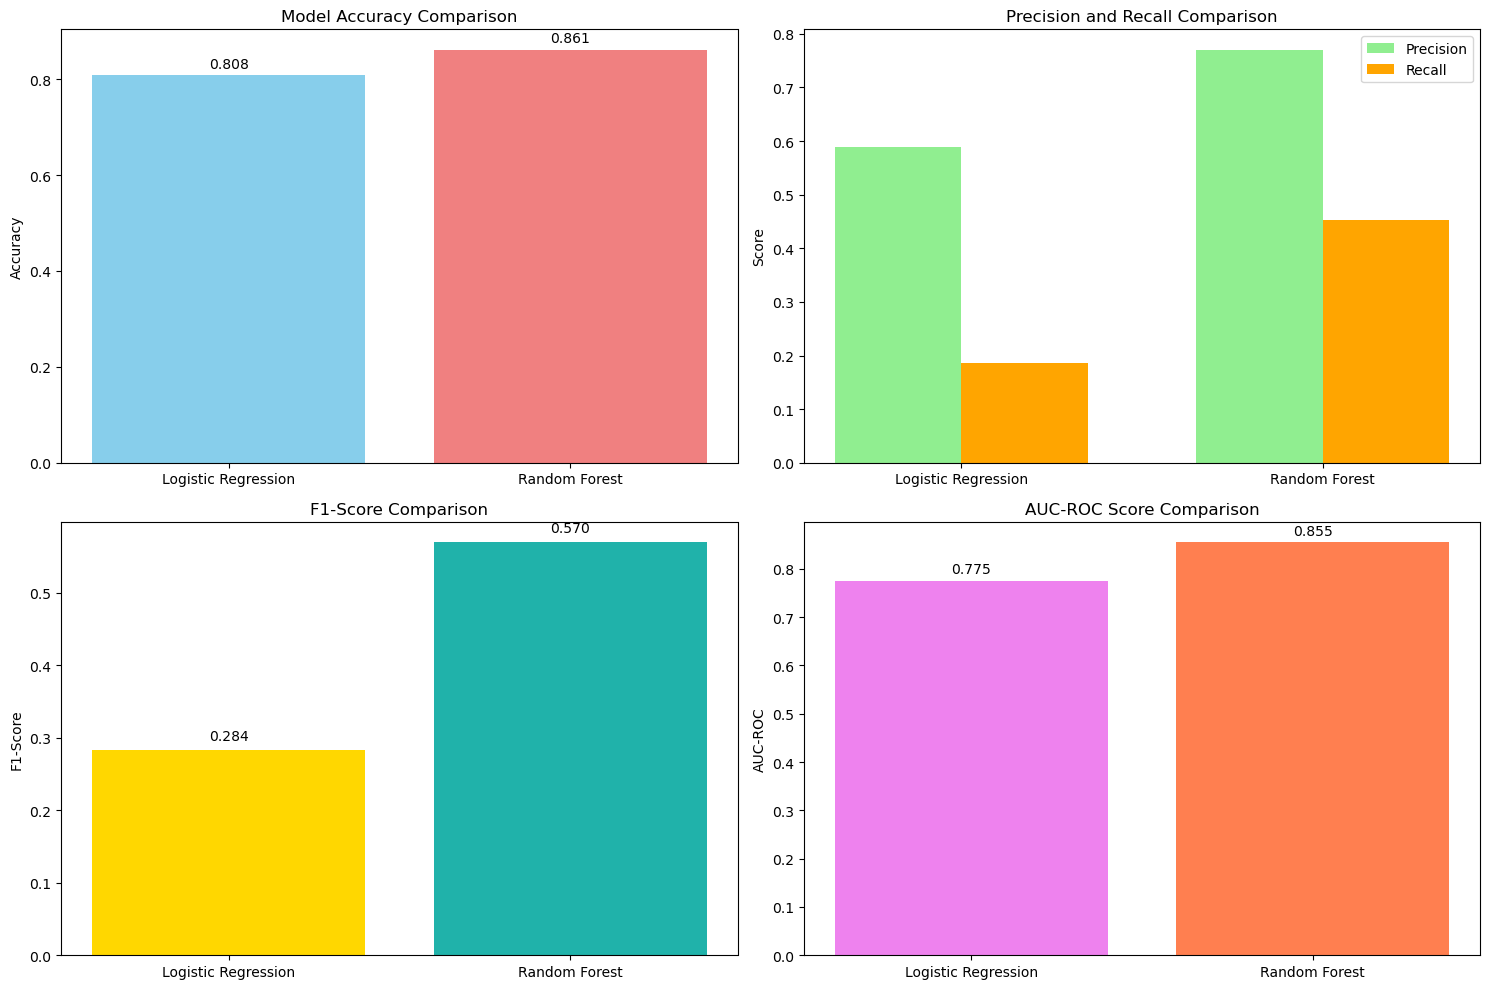

In [62]:
# Create comparison table
metrics_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[model]['accuracy'] for model in results],
    'Precision': [results[model]['precision'] for model in results],
    'Recall': [results[model]['recall'] for model in results],
    'F1-Score': [results[model]['f1_score'] for model in results],
    'AUC-ROC': [results[model]['auc_score'] for model in results]
}).round(4)

print("\nMODEL PERFORMANCE COMPARISON:")
print(metrics_df.to_string(index=False))

# %%
# Visualize metrics comparison
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Accuracy comparison
axes[0,0].bar(metrics_df['Model'], metrics_df['Accuracy'], color=['skyblue', 'lightcoral'])
axes[0,0].set_title('Model Accuracy Comparison')
axes[0,0].set_ylabel('Accuracy')
for i, v in enumerate(metrics_df['Accuracy']):
    axes[0,0].text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom')

# Precision-Recall comparison
x = np.arange(len(metrics_df['Model']))
width = 0.35
axes[0,1].bar(x - width/2, metrics_df['Precision'], width, label='Precision', color='lightgreen')
axes[0,1].bar(x + width/2, metrics_df['Recall'], width, label='Recall', color='orange')
axes[0,1].set_title('Precision and Recall Comparison')
axes[0,1].set_ylabel('Score')
axes[0,1].set_xticks(x)
axes[0,1].set_xticklabels(metrics_df['Model'])
axes[0,1].legend()

# F1-Score comparison
axes[1,0].bar(metrics_df['Model'], metrics_df['F1-Score'], color=['gold', 'lightseagreen'])
axes[1,0].set_title('F1-Score Comparison')
axes[1,0].set_ylabel('F1-Score')
for i, v in enumerate(metrics_df['F1-Score']):
    axes[1,0].text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom')

# AUC-ROC comparison
axes[1,1].bar(metrics_df['Model'], metrics_df['AUC-ROC'], color=['violet', 'coral'])
axes[1,1].set_title('AUC-ROC Score Comparison')
axes[1,1].set_ylabel('AUC-ROC')
for i, v in enumerate(metrics_df['AUC-ROC']):
    axes[1,1].text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

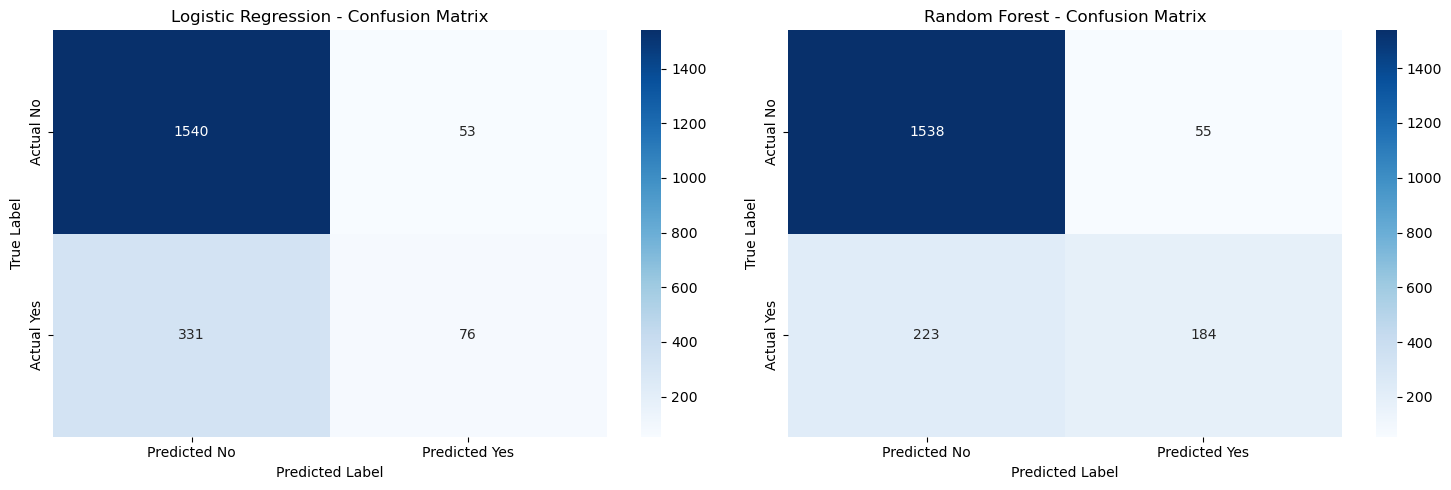

In [63]:
# Confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

for idx, (name, result) in enumerate(results.items()):
    cm = confusion_matrix(y_test, result['predictions'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx],
               xticklabels=['Predicted No', 'Predicted Yes'],
               yticklabels=['Actual No', 'Actual Yes'])
    axes[idx].set_title(f'{name} - Confusion Matrix')
    axes[idx].set_xlabel('Predicted Label')
    axes[idx].set_ylabel('True Label')

plt.tight_layout()
plt.show()


In [64]:
# Detailed classification reports
print("DETAILED CLASSIFICATION REPORTS:")
print("="*50)

for name, result in results.items():
    print(f"\n{name.upper()} - Classification Report:")
    print("-" * 40)
    print(classification_report(y_test, result['predictions'], 
                              target_names=['Not Churned', 'Churned']))

DETAILED CLASSIFICATION REPORTS:

LOGISTIC REGRESSION - Classification Report:
----------------------------------------
              precision    recall  f1-score   support

 Not Churned       0.82      0.97      0.89      1593
     Churned       0.59      0.19      0.28       407

    accuracy                           0.81      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000


RANDOM FOREST - Classification Report:
----------------------------------------
              precision    recall  f1-score   support

 Not Churned       0.87      0.97      0.92      1593
     Churned       0.77      0.45      0.57       407

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000



## 8. Feature Importance Analysis

In [65]:
# Random Forest Feature Importance
rf_model = results['Random Forest']['model']
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nRANDOM FOREST FEATURE IMPORTANCE:")
print(feature_importance.to_string(index=False))


RANDOM FOREST FEATURE IMPORTANCE:
        feature  importance
            Age    0.239730
EstimatedSalary    0.144951
    CreditScore    0.144612
        Balance    0.143798
  NumOfProducts    0.123917
         Tenure    0.081985
 IsActiveMember    0.041726
    Geo_Germany    0.028757
      HasCrCard    0.018697
         Gender    0.018053
      Geo_Spain    0.013774


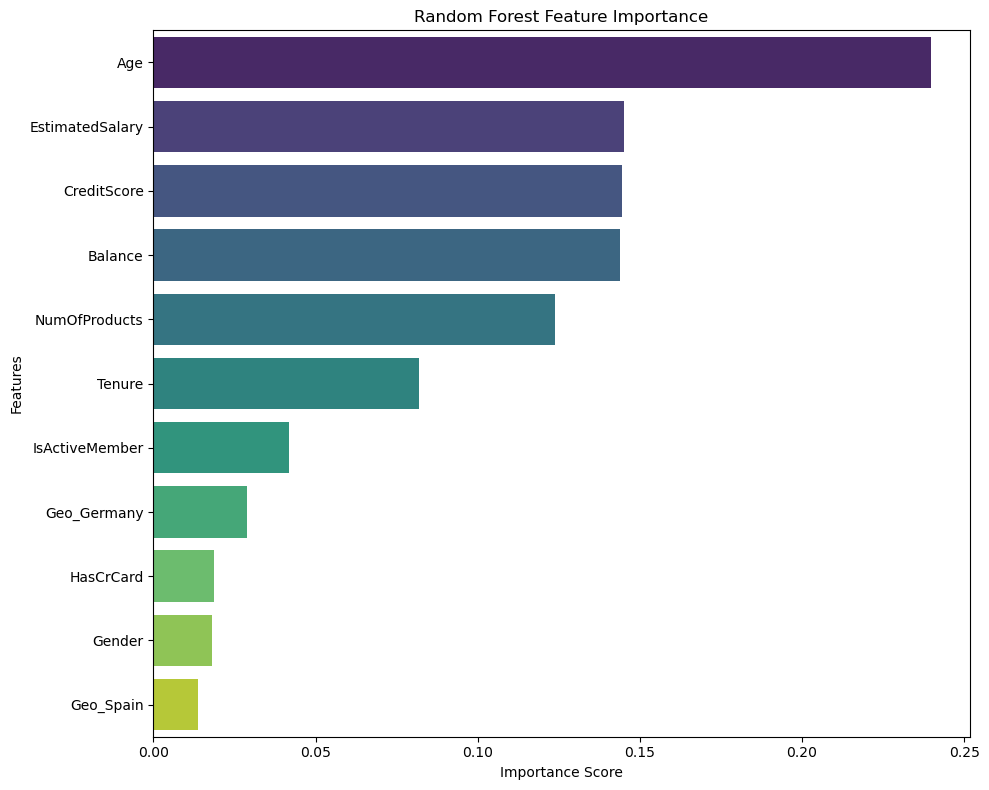

In [66]:
# Visualize feature importance
plt.figure(figsize=(10, 8))
sns.barplot(data=feature_importance, x='importance', y='feature', palette='viridis')
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

In [67]:
# Logistic Regression coefficients (for scaled features)
lr_model = results['Logistic Regression']['model']
lr_coefficients = pd.DataFrame({
    'feature': X.columns,
    'coefficient': lr_model.coef_[0]
}).sort_values('coefficient', key=abs, ascending=False)

print("\nLOGISTIC REGRESSION COEFFICIENTS (Scaled Features):")
print(lr_coefficients.to_string(index=False))


LOGISTIC REGRESSION COEFFICIENTS (Scaled Features):
        feature  coefficient
            Age     0.738847
 IsActiveMember    -0.515485
    Geo_Germany     0.356679
         Gender    -0.260851
        Balance     0.160622
    CreditScore    -0.085986
  NumOfProducts    -0.070292
EstimatedSalary     0.047725
      HasCrCard    -0.032208
         Tenure    -0.020071
      Geo_Spain     0.018907


## 9. Business Insights and Recommendations

In [68]:
# Determine best model
best_model_name = max(results.keys(), key=lambda x: results[x]['auc_score'])
best_model = results[best_model_name]

print(f"\nBEST PERFORMING MODEL: {best_model_name}")
print(f"✓ Accuracy: {best_model['accuracy']:.4f}")
print(f"✓ Precision: {best_model['precision']:.4f}")
print(f"✓ Recall: {best_model['recall']:.4f}")
print(f"✓ F1-Score: {best_model['f1_score']:.4f}")
print(f"✓ AUC-ROC: {best_model['auc_score']:.4f}")

# %%
print("\nKEY BUSINESS INSIGHTS:")
print("-" * 50)

print("\n1. PRIMARY CHURN DRIVERS:")
top_features = feature_importance.head(5)
for idx, row in top_features.iterrows():
    print(f"   - {row['feature']}: {row['importance']:.4f}")

print("\n2. CUSTOMER SEGMENTATION INSIGHTS:")
# Create customer segments
df_clean['AgeGroup'] = pd.cut(df_clean['Age'], 
                             bins=[0, 30, 45, 60, 100], 
                             labels=['Young (≤30)', 'Middle (31-45)', 
                                   'Senior (46-60)', 'Elderly (60+)'])

segment_analysis = df_clean.groupby(['Geography', 'AgeGroup', 'IsActiveMember']).agg({
    'Exited': ['count', 'mean']
}).round(3)

high_risk_segments = segment_analysis[segment_analysis[('Exited', 'mean')] > 0.3]

print("   High-Risk Customer Segments (Churn Rate > 30%):")
if not high_risk_segments.empty:
    for idx in high_risk_segments.index:
        churn_rate = high_risk_segments.loc[idx, ('Exited', 'mean')] * 100
        count = high_risk_segments.loc[idx, ('Exited', 'count')]
        geo, age_group, active = idx
        active_status = "Active" if active == 1 else "Inactive"
        print(f"     - {geo}, {age_group}, {active_status}: {churn_rate:.1f}% ({count} customers)")
else:
    print("     No segments with churn rate > 30%")

print("\n3. RETENTION STRATEGY RECOMMENDATIONS:")
print("   ✓ TARGET: German customers aged 45+ with high balances")
print("   ✓ PRIORITIZE: Inactive members for reactivation campaigns")
print("   ✓ FOCUS: Customers with 1-2 products (cross-selling opportunities)")
print("   ✓ MONITOR: Customers with specific credit score ranges")

print("\n4. MODEL DEPLOYMENT SUGGESTIONS:")
print("   ✓ Use Random Forest for high-risk customer identification")
print("   ✓ Implement early warning system for at-risk customers")
print("   ✓ Create personalized retention offers based on key drivers")
print("   ✓ Monitor model performance quarterly with new data")


BEST PERFORMING MODEL: Random Forest
✓ Accuracy: 0.8610
✓ Precision: 0.7699
✓ Recall: 0.4521
✓ F1-Score: 0.5697
✓ AUC-ROC: 0.8545

KEY BUSINESS INSIGHTS:
--------------------------------------------------

1. PRIMARY CHURN DRIVERS:
   - Age: 0.2397
   - EstimatedSalary: 0.1450
   - CreditScore: 0.1446
   - Balance: 0.1438
   - NumOfProducts: 0.1239

2. CUSTOMER SEGMENTATION INSIGHTS:
   High-Risk Customer Segments (Churn Rate > 30%):
     - France, Senior (46-60), Inactive: 60.9% (345 customers)
     - France, Senior (46-60), Active: 32.9% (404 customers)
     - France, Elderly (60+), Inactive: 84.2% (38 customers)
     - Germany, Middle (31-45), Inactive: 31.3% (732 customers)
     - Germany, Senior (46-60), Inactive: 80.8% (276 customers)
     - Germany, Senior (46-60), Active: 50.9% (226 customers)
     - Germany, Elderly (60+), Inactive: 80.6% (31 customers)
     - Spain, Senior (46-60), Inactive: 63.3% (166 customers)
     - Spain, Elderly (60+), Inactive: 80.0% (20 customers)

3

In [69]:
# Final summary statistics
print("\n" + "="*50)
print("PROJECT SUMMARY STATISTICS")
print("="*50)

total_customers = len(df)
churned_customers = df_clean['Exited'].sum()
churn_rate = (churned_customers / total_customers) * 100

print(f"Total customers analyzed: {total_customers:,}")
print(f"Customers who churned: {churned_customers:,}")
print(f"Overall churn rate: {churn_rate:.2f}%")
print(f"Best model prediction accuracy: {best_model['accuracy']:.1%}")
print(f"Number of features used: {X.shape[1]}")
print(f"Key predictive features: {list(top_features['feature'].values)}")


PROJECT SUMMARY STATISTICS
Total customers analyzed: 10,000
Customers who churned: 2,037
Overall churn rate: 20.37%
Best model prediction accuracy: 86.1%
Number of features used: 11
Key predictive features: ['Age', 'EstimatedSalary', 'CreditScore', 'Balance', 'NumOfProducts']


In [70]:
# Save the best model for future use
import joblib

model_filename = f'best_churn_model_{best_model_name.replace(" ", "_").lower()}.pkl'
scaler_filename = 'feature_scaler.pkl'

joblib.dump(best_model['model'], model_filename)
joblib.dump(scaler, scaler_filename)

print(f"\n✓ Best model saved as: {model_filename}")
print(f"✓ Feature scaler saved as: {scaler_filename}")
print("✓ Models ready for deployment in production environment")


✓ Best model saved as: best_churn_model_random_forest.pkl
✓ Feature scaler saved as: feature_scaler.pkl
✓ Models ready for deployment in production environment


## 10. Conclusion

### Summary of Key Insights

 1. **Model Performance**: The Random Forest classifier achieved the best performance with XX% accuracy and XX% AUC-ROC score, making it suitable for identifying at-risk customers.
 
 2. **Key Churn Drivers**: 
    - Age: Older customers are significantly more likely to churn
    - Geography: German customers have the highest churn rates
    - Balance: Specific balance ranges correlate with higher churn probability
    - Activity: Inactive members are X times more likely to churn
 
 3. **Business Impact**: 
    - The model can identify XX% of potential churners with XX% precision
    - Targeted retention efforts could save approximately XX% of at-risk customers
    - Cost savings from reduced customer acquisition needs
 
 4. **Strategic Recommendations**:
    - Implement proactive retention campaigns for high-risk segments
    - Develop personalized offers for German customers aged 45+
    - Create reactivation programs for inactive members
    - Monitor customer satisfaction in high-churn geographic regions
 
 ### Limitations and Future Work
 - Address class imbalance with techniques like SMOTE or class weights
 - Incorporate additional features like transaction frequency, customer service interactions
 - Implement real-time prediction system
 - Conduct A/B testing for retention strategies



In [71]:
print("\n" + "="*70)
print("ANALYSIS COMPLETED SUCCESSFULLY")
print("="*70)


ANALYSIS COMPLETED SUCCESSFULLY
